In [1]:
# If percentiles not yet written to datafile, need to rerun 3.2a first.

In [2]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.wcs import WCS
#! pip install aplpy
import aplpy

import os, sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/PythonFunctions')

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
database = Table.read(SNe_Gal_File, format='csv') 

for i in range(len(database)):
    print(database["galaxy"][i],database["SN_type"][i], database["SN_percentile"][i])

ngc1566 II 0.98
ngc4321 I 0.56
ngc5236 II 0.39
ngc4303 II non-detection
ngc1511 unclassified 0.1
ngc0253 I 0.99
ngc5236 unclassified 0.99
ngc5236 unclassified 0.96
ngc4321 I 0.92
ngc4496a Ia non-detection
ngc4303 II non-detection
ngc4303 II non-detection
ngc4254 II 0.82
ngc5236 II 1.0
ngc4254 II 0.17
ngc3627 II 0.7
ngc4321 II non-detection
ngc4536 Ia non-detection
ngc5236 Ib 0.21
ngc1365 Ic 0.24
ngc1559 II 0.84
ngc1433 II non-detection
ngc5128 Ia 0.65
ngc4254 II 0.75
ngc1559 II non-detection
ngc4496a II non-detection
ngc3627 Ia 0.9
ngc1097 II 0.99
ngc2775 Ia non-detection
ngc1087 II 0.9
circinus II 0.98
ngc1637 II 0.76
ngc1097 II non-detection
ngc4303 II 0.43
ngc1365 II non-detection
ngc2997 Ic 1.0
ngc6744 Ic 0.8
ngc1559 Ia non-detection
ngc4321 Ia non-detection
ngc4303 II non-detection
ngc5530 II 0.44
ngc7793 II non-detection
ngc2997 unclassified 0.93
ngc3627 II 0.99
ngc1559 II 0.31
ngc1566 Ia 0.84
ngc4945 II 0.93
ngc3239 II non-detection
ngc4424 Ia non-detection
ngc1365 Ia non-detect

In [3]:
# p = database["SN_percentile"]
# for i in range(len(p)):
#     if p[i] != False:
#         better = p[i][1:-1]
#         print(better)
#        # better = round(float(better),3)
#         p[i] = better
#     else:
#         p[i] = "non-detection"
# for i in range(len(database)):
#     print(database["SN_percentile_2"][i])

In [4]:

gal_groups = database.group_by('galaxy')
gals = gal_groups.groups.keys
indices = gal_groups.groups.indices
indices = indices.tolist()
indices.append(0)

print(gals)
# print(indices)
# print(gal_groups["SN_name"][4])

images, errFiles, name, types, ras, decs, percentiles = [],[],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs, SNpercentiles = [],[],[],[],[]
    images.append(gal_groups["ImageFile150"][indices[i]])
    errFiles.append(gal_groups["ErrFile150"][indices[i]])
    SNnames.append(gal_groups["SN_name"][indices[i]])
    SNtypes.append(gal_groups["SN_type"][indices[i]])
    SNras.append(gal_groups["SN_ra"][indices[i]])
    SNdecs.append(gal_groups["SN_dec"][indices[i]])
    SNpercentiles.append(gal_groups["SN_percentile"][indices[i]])
    j = 1
    while(indices[i] + j < indices[i+1]):
        SNnames.append(gal_groups["SN_name"][indices[i]+j])
        SNtypes.append(gal_groups["SN_type"][indices[i]+j])
        SNras.append(gal_groups["SN_ra"][indices[i]+j])
        SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        SNpercentiles.append(gal_groups["SN_percentile"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    percentiles.append(SNpercentiles)
    
  

 galaxy 
--------
circinus
 ngc0253
 ngc0628
 ngc1087
 ngc1097
 ngc1365
 ngc1433
 ngc1511
 ngc1559
 ngc1566
     ...
 ngc4321
 ngc4424
 ngc4457
ngc4496a
 ngc4536
 ngc4945
 ngc5128
 ngc5236
 ngc5530
 ngc6744
 ngc7793
Length = 28 rows


In [5]:
# set up plots, wcs information, and make sigma maps for contours.
import matplotlib.pyplot as plt
plots, sigma, wcss, hdus, plotAspect = [],[],[],[],[]

for i in range(len(gals)):
    print(images[i])
    if os.path.isfile(images[i]):
        print(images[i], "Has File")
        co_hdu = pyfits.open(images[i])
        hdus.append(co_hdu)
        co_map = co_hdu[0].data
        plots.append(co_map)
        err_hdu = pyfits.open(errFiles[i])
        err_map = err_hdu[0].data
        sig_map = co_map / err_map
        sigma.append(sig_map)
        wcss.append(WCS(co_hdu[0].header, naxis=2))
        x = co_map.shape[0]
        y = co_map.shape[1]
        aspect = float(y)/float(x)
        plotAspect.append(aspect)


/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits Has File
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_150pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_150pc_broad_mom0.fits Has File
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0628/ngc0628_12m+7m+tp_co21_150pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0628/ngc0628_12m+7m+tp_co21_150pc_broad_mom0.fits Has File
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1087/ngc1087_12m+7m+tp_co21_150pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1087/ngc1087_12m+7m+tp_co21_150pc_broad_mom0.fits Has File
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1097/ngc1097_12m+7m+tp_co21

In [6]:
print(len(name))
#percentiles = [['0.98'], ['0.99'], ['non-detection'], ['non-detection', 'non-detection'], ['0.9'], ['0.99', 'non-detection'], ['0.24', 'non-detection', 'non-detection'], ['non-detection'], ['0.1'], ['0.84', 'non-detection', 'non-detection', '0.31'], ['0.98', '0.84'], ['0.76'], ['non-detection'], ['1.0', '0.93'], ['non-detection'], ['0.7', '0.9', '0.43', '0.99', '0.4'], ['0.82', '0.17', '0.75', '0.98'], ['non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection'], ['0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93'], ['non-detection'], ['0.75'], ['non-detection', 'non-detection'], ['non-detection'], ['0.93'], ['0.65', '0.95'], ['0.39', '0.99', '0.96', '1.0', '0.21'], ['0.44'], ['0.8'], ['non-detection']]
print(len(percentiles))
print(percentiles)

28
28
[['0.98'], ['0.99'], ['non-detection'], ['0.9'], ['0.99', 'non-detection'], ['0.24', 'non-detection', 'non-detection'], ['non-detection'], ['0.1'], ['0.84', 'non-detection', 'non-detection', '0.31'], ['0.98', '0.84'], ['0.76'], ['non-detection'], ['1.0', '0.93'], ['non-detection'], ['0.7', '0.9', '0.99', '0.4'], ['0.82', '0.17', '0.75', '0.98'], ['non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection'], ['0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93'], ['non-detection'], ['0.75'], ['non-detection', 'non-detection'], ['non-detection'], ['0.93'], ['0.65', '0.95'], ['0.39', '0.99', '0.96', '1.0', '0.21'], ['0.44'], ['0.8'], ['non-detection']]


In [7]:
legendLabels = []

for i in range(len(name)):
    legendlabel = []
    if len(name[i]) > 1:
        for k in range(len(name[i])):  
            percen = percentiles[i][k]
            per = str(percen)
            label = ('"' + name[i][k] + '" SN '  + types[i][k] + " " + str(percentiles[i][k]))
            legendlabel.append(label)
    else:
        #print(name[i][0], types[i][0], percentiles[i][0])
        legendlabel.append('"' + name[i][0] + '" SN '  + types[i][0] + " " + str(percentiles[i][0]))
    legendLabels.append(legendlabel)
print(legendLabels)

[['"SN1996cr" SN II 0.98'], ['"SN1940E" SN I 0.99'], ['"SN2013ej" SN II non-detection'], ['"SN1995V" SN II 0.9'], ['"SN1992bd" SN II 0.99', '"SN1999eu" SN II non-detection'], ['"SN1983V" SN Ic 0.24', '"SN2001du" SN II non-detection', '"SN2012fr" SN Ia non-detection'], ['"SN1985P" SN II non-detection'], ['"SN1935C" SN unclassified 0.1'], ['"SN1984J" SN II 0.84', '"SN1986L" SN II non-detection', '"SN2005df" SN Ia non-detection', '"SN2009ib" SN II 0.31'], ['"ASASSN-14ha" SN II 0.98', '"SN2010el" SN Ia 0.84'], ['"SN1999em" SN II 0.76'], ['"SN1993Z" SN Ia non-detection'], ['"SN2003jg" SN Ic 1.0', '"SN2008eh" SN unclassified 0.93'], ['"SN2012A" SN II non-detection'], ['"SN1973R" SN II 0.7', '"SN1989B" SN Ia 0.9', '"SN2009hd" SN II 0.99', '"SN2016cok" SN II 0.4'], ['"SN1967H" SN II 0.82', '"SN1972Q" SN II 0.17', '"SN1986I" SN II 0.75', '"SN2014L" SN Ic 0.98'], ['"SN1926A" SN II non-detection', '"SN1961I" SN II non-detection', '"SN1964F" SN II non-detection', '"SN1999gn" SN II 0.43', '"SN2006o

<ipython-input-8-96955c94ff67>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-8-96955c94ff67>:13: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-8-96955c94ff67>:13: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


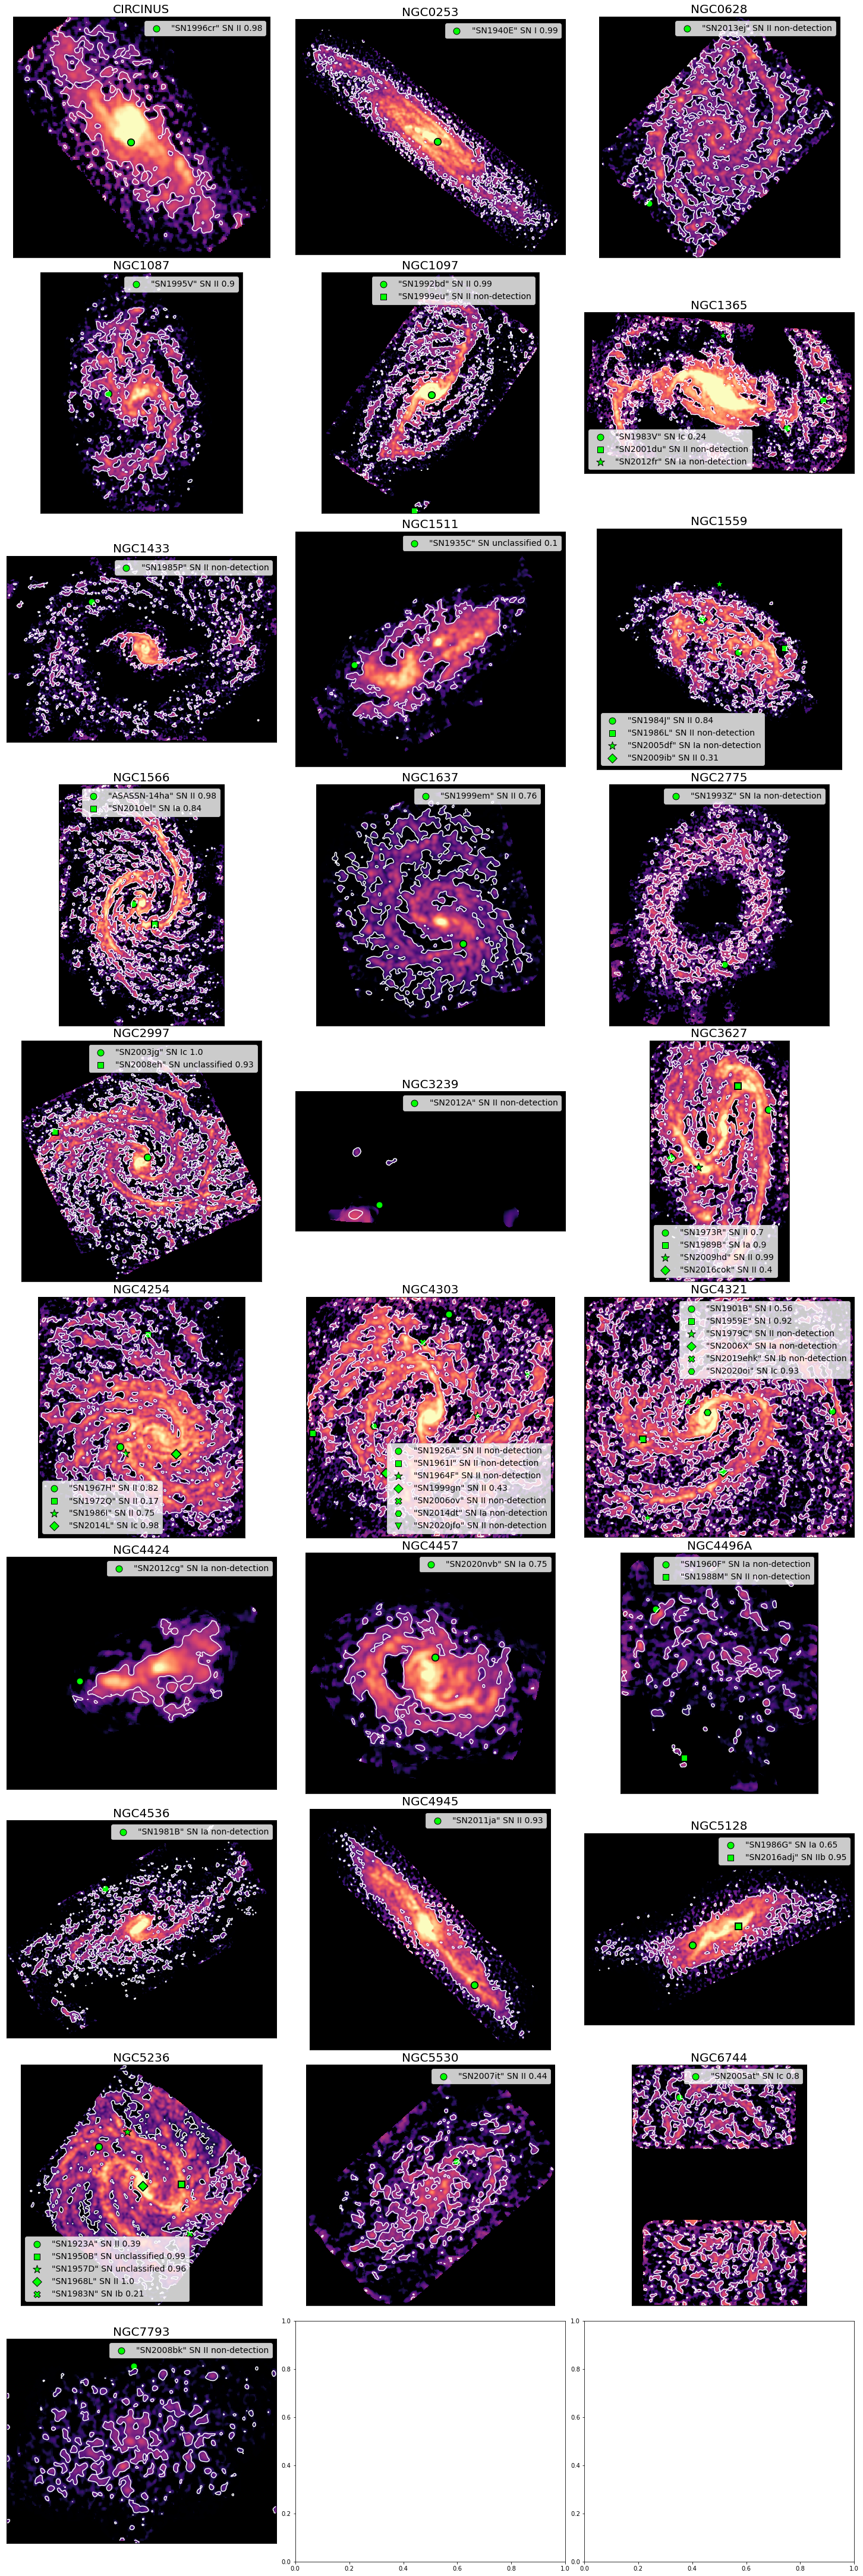

In [8]:
markerShapes = ["o", "s", "*", "D", "X", "H", "v"]
markerSizes  = [120,120,200,120,120,120,120]

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
for plot in plots:
    xArr, yArr = wcss[m].wcs_world2pix(ras[m],decs[m],0)
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0)
    axs[i][j].set_title(gals[m][0].upper(), fontsize=20)
    axs[i][j].contour(sigma[m], [3], colors = ["white"], linestyles = ("-"))
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    for n in range(len(decs[m])):
        axs[i][j].scatter(xArr[n], yArr[n], color = "black", marker = markerShapes[n], s = markerSizes[n]+30)
        axs[i][j].scatter(xArr[n], yArr[n], color = "lime", marker = markerShapes[n], s = markerSizes[n], edgecolor="black", label = legendLabels[m][n])
    axs[i][j].legend(loc="best", fontsize=14)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m +=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllSNeInGalaxies.png", dpi=300)
   

print()

In [9]:
print(name)
print(types)
print(percentiles)

[['SN1996cr'], ['SN1940E'], ['SN2013ej'], ['SN1995V'], ['SN1992bd', 'SN1999eu'], ['SN1983V', 'SN2001du', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN1993Z'], ['SN2003jg', 'SN2008eh'], ['SN2012A'], ['SN1973R', 'SN1989B', 'SN2009hd', 'SN2016cok'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1926A', 'SN1961I', 'SN1964F', 'SN1999gn', 'SN2006ov', 'SN2014dt', 'SN2020jfo'], ['SN1901B', 'SN1959E', 'SN1979C', 'SN2006X', 'SN2019ehk', 'SN2020oi'], ['SN2012cg'], ['SN2020nvb'], ['SN1960F', 'SN1988M'], ['SN1981B'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[['II'], ['I'], ['II'], ['II'], ['II', 'II'], ['Ic', 'II', 'Ia'], ['II'], ['unclassified'], ['II', 'II', 'Ia', 'II'], ['II', 'Ia'], ['II'], ['Ia'], ['Ic', 'unclassified'], ['II'], ['II', 'Ia', 'II', 'II'], ['II', 'II', 'II', 'Ic'], ['II', 'II', 'II', 'II', '

In [15]:
types = ['II', 'I', 'IIn/LBV', 'II', 'IIn/LBV', 'II', 'II', 'II', 'Ic', 'II', 'Ia', 'II', 'unclassified', 'II', 'II', 'Ia', 'II', 'II', 'Ia', 'II', 'Ia', 'Ic', 'unclassified', 'II', 'II', 'Ia', 'IIn', 'II', 'II', 'II', 'II', 'II', 'Ic', 'II', 'II', 'II', 'II', 'II', 'Ia', 'II', 'I', 'I', 'II', 'Ia', 'Ib', 'Ic', 'Ia', 'Ia', 'Ia', 'II', 'Ia', 'II', 'Ia', 'IIb', 'II', 'unclassified', 'unclassified', 'II', 'Ib', 'II', 'Ic', 'II', 'II']
percentiles = ['0.98', '0.99', 'non-detection', 'non-detection', 'non-detection', '0.9', '0.99', 'non-detection', '0.24', 'non-detection', 'non-detection', 'non-detection', '0.1', '0.84', 'non-detection', 'non-detection', '0.31', '0.98', '0.84', '0.76', 'non-detection', '1.0', '0.93', 'non-detection', '0.7', '0.9', '0.43', '0.99', '0.4', '0.82', '0.17', '0.75', '0.98', 'non-detection', 'non-detection', 'non-detection', '0.43', 'non-detection', 'non-detection', 'non-detection', '0.56', '0.92', 'non-detection', 'non-detection', 'non-detection', '0.93', 'non-detection', '0.75', 'non-detection', 'non-detection', 'non-detection', '0.93', '0.65', '0.95', '0.39', '0.99', '0.96', '1.0', '0.21', '0.44', '0.8', 'non-detection', 'non-detection']
tiles = []

for i in range(len(percentiles)):
    if percentiles[i] == "non-detection":
        tiles.append(0.0)
    else:
        tiles.append(percentiles[i])

Ias, IIs, SEs, UnC, IIn, allTiles = [],[],[],[],[],[]     
for i in range(len(types)):
    if types[i] == "I" or types[i] == "unclassified":
        UnC.append(float(tiles[i]))
        allTiles.append(float(tiles[i]))
    elif types[i] == "Ia":
        Ias.append(float(tiles[i]))
        allTiles.append(float(tiles[i]))
    elif types[i] == "II":
        IIs.append(float(tiles[i]))
        allTiles.append(float(tiles[i]))
    elif types[i] == "Ib" or types[i] == "Ic" or types[i] == "IIb": 
        SEs.append(float(tiles[i]))
        allTiles.append(float(tiles[i]))
    else:
        IIn.append(float(tiles[i]))
        
print(len(types))


63


In [11]:
Ias = np.sort(Ias)
IIs = np.sort(IIs)
SEs = np.sort(SEs)
IIn = np.sort(IIn)
UnC = np.sort(UnC)
Til = np.sort(allTiles)

print(len(percentiles))
print(len(Ias), len(IIs), len(SEs), len(IIn), len(UnC))
for i in range(len(percentiles)):
    print(percentiles[i], types[i])


63
12 33 8 3 7
0.98 II
0.99 I
non-detection IIn/LBV
non-detection II
non-detection IIn/LBV
0.9 II
0.99 II
non-detection II
0.24 Ic
non-detection II
non-detection Ia
non-detection II
0.1 unclassified
0.84 II
non-detection II
non-detection Ia
0.31 II
0.98 II
0.84 Ia
0.76 II
non-detection Ia
1.0 Ic
0.93 unclassified
non-detection II
0.7 II
0.9 Ia
0.43 IIn
0.99 II
0.4 II
0.82 II
0.17 II
0.75 II
0.98 Ic
non-detection II
non-detection II
non-detection II
0.43 II
non-detection II
non-detection Ia
non-detection II
0.56 I
0.92 I
non-detection II
non-detection Ia
non-detection Ib
0.93 Ic
non-detection Ia
0.75 Ia
non-detection Ia
non-detection II
non-detection Ia
0.93 II
0.65 Ia
0.95 IIb
0.39 II
0.99 unclassified
0.96 unclassified
1.0 II
0.21 Ib
0.44 II
0.8 Ic
non-detection II
non-detection II


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.17 0.21 0.24
 0.31 0.39 0.4  0.43 0.44 0.56 0.65 0.7  0.75 0.75 0.76 0.8  0.82 0.84
 0.84 0.9  0.9  0.92 0.93 0.93 0.93 0.95 0.96 0.98 0.98 0.98 0.99 0.99
 0.99 0.99 1.   1.  ]


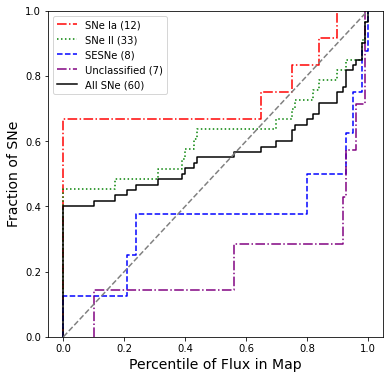

In [12]:
fig = plt.figure(figsize=(6,6))

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
yTil = np.linspace(0,1,len(Til))

sns.ecdfplot(data=Ias, color="red", label = "SNe Ia (12)", ls = "dashdot")
sns.ecdfplot(data=IIs, color="green", label = "SNe II (33)", ls = ":")
sns.ecdfplot(data=SEs, color="blue", label = "SESNe (8)", ls = "dashed")
#sns.ecdfplot(data=IIn, color="blue", label = "SNe IIn (3)", ls = "dashdot")
sns.ecdfplot(data=UnC, color="purple", label = "Unclassified (7)", ls = "dashdot")
sns.ecdfplot(data=Til, color="black", label = "All SNe (60)", ls = "-")
#plt.plot(Til,yTil, color="black", label = "All SNe")
plt.plot(x,y,ls="--", color = 'grey')
plt.xlabel("Percentile of Flux in Map", fontsize = 14)
plt.legend(loc="upper left", fontsize = 10)
plt.ylabel("Fraction of SNe", fontsize = 14)
fig.savefig("../Figures/CDFAllTypes.png", dpi = 300)

print(Til)

In [13]:
print(UnC)

[0.1  0.56 0.92 0.93 0.96 0.99 0.99]


In [14]:
plt.close('all')